In [3]:
from pandas import read_csv
dataset = read_csv(r'C:\Users\betha\OneDrive\Documents\CSC5220\Lab2_dataset.csv')  # importing csv
print(dataset)

    x_training  y_training   x_test    y_test    x_val      y_val
0     -15.9368      2.1343 -33.3180   3.31690 -16.7465   4.170200
1     -29.1530      1.1733 -37.9122   5.39770 -14.5775   4.067300
2      36.1895     34.3591 -51.2069   0.13043  34.5158  31.873100
3      37.4922     36.8380  -6.1326   6.19260 -47.0101  10.623700
4     -48.0588      2.8090  21.2612  17.08850  36.9751  31.836000
5      -8.9415      2.1211 -40.3195   0.79951 -40.6861   4.959400
6      15.3078     14.7103 -14.5415   2.82480  -4.4720   4.451600
7     -34.7063      2.6142  32.5598  28.62120  26.5336  22.276300
8       1.3892      3.7402  13.3934  17.04640 -42.7977  -0.000044
9     -44.3838      3.7317  44.2099  55.38440  25.3741  20.503800
10      7.0135      7.6277  -1.1427   4.07940 -31.1096   3.858300
11     22.7627     22.7524 -12.7669   8.27040  27.3118  19.365100
12         NaN         NaN  34.0545  31.32360  -3.2639   4.883800
13         NaN         NaN  39.2235  39.15910  -1.8183  11.097200
14        

In [20]:
    print("The shape is", dataset.shape)  # shape and checking to see if all data is there
    print()  # dataset.shape shows us how many rows and columns are in the data

    print("Training Set: ")  # defining training set
    x_training = dataset.iloc[:12, :1]  # gets rows until the 12th row and first two columns
    y_training = dataset.iloc[:12, 1:2]
    training_set = print(dataset[["x_training", "y_training"]])
    print()

    print("Test Set:")  # defining test set
    x_testing = dataset.iloc[:, 2:3]  # gets all rows and next two columns
    y_testing = dataset.iloc[:, 3:4]
    testing_set = print(dataset[["x_test", "y_test"]])
    print()

    print("Validation Set:")  # defining validation set
    x_validation = dataset.iloc[:, 4:5]  # gets all rows and last two columns
    y_validation = dataset.iloc[:, 5:6]
    validation_set = print(dataset[["x_val", "y_val"]])
    print()

The shape is (21, 6)

Training Set: 
    x_training  y_training
0     -15.9368      2.1343
1     -29.1530      1.1733
2      36.1895     34.3591
3      37.4922     36.8380
4     -48.0588      2.8090
5      -8.9415      2.1211
6      15.3078     14.7103
7     -34.7063      2.6142
8       1.3892      3.7402
9     -44.3838      3.7317
10      7.0135      7.6277
11     22.7627     22.7524
12         NaN         NaN
13         NaN         NaN
14         NaN         NaN
15         NaN         NaN
16         NaN         NaN
17         NaN         NaN
18         NaN         NaN
19         NaN         NaN
20         NaN         NaN

Test Set:
     x_test    y_test
0  -33.3180   3.31690
1  -37.9122   5.39770
2  -51.2069   0.13043
3   -6.1326   6.19260
4   21.2612  17.08850
5  -40.3195   0.79951
6  -14.5415   2.82480
7   32.5598  28.62120
8   13.3934  17.04640
9   44.2099  55.38440
10  -1.1427   4.07940
11 -12.7669   8.27040
12  34.0545  31.32360
13  39.2235  39.15910
14   1.9745   8.08730
15  29

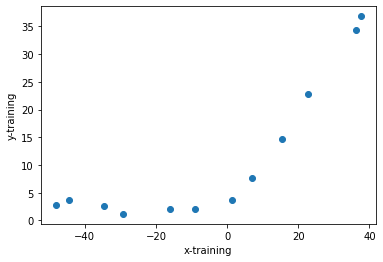

In [23]:
from matplotlib import pyplot as plt

x_train = dataset['x_training'].tolist()
y_train = dataset['y_training'].tolist()
plt.scatter(x_train, y_train)
plt.xlabel('x-training')  # labels x-axis
pyplot.ylabel('y-training')  # labels y-axis
pyplot.show()  # displays scatter plot


In [96]:
import numpy as np

In [108]:
#def gradient_descent(x, y):
x = np.array(x_training)
y = np.array(y_training)
m_curr = b_curr = 0
n = len(x)
learn_rate = 0.001
iterations = 1000
for iter in range(iterations):
# while abs(curr_cost - prev_cost) =< 0.001:
    y_predict = m_curr * x + b_curr
    curr_cost = (1/n) * sum([value ** 2 for value in (y-y_predict)])
    prev_cost = curr_cost
    md = -(2/n) * sum(x*(y-y_predict))  # partial derivative with respect to m
    bd = -(2/n) * sum(x*(y-y_predict))   # partial derivative with respect to b
    m_curr = m_curr - learn_rate * md
    b_curr = b_curr - learn_rate * bd
    print("m {}, b {}, curr_cost {}, prev_cost iteration {}".format(m_curr, b_curr, curr_cost, prev_cost, iter))

# return cost, iter 

#gradient_descent(x_training,y_training)


m [0.49130319], b [0.49130319], curr_cost [281.90854784], prev_cost iteration [281.90854784]
m [0.1534639], b [0.1534639], curr_cost [232.20126321], prev_cost iteration [232.20126321]
m [0.3857754], b [0.3857754], curr_cost [222.84496801], prev_cost iteration [222.84496801]
m [0.22602893], b [0.22602893], curr_cost [208.69237438], prev_cost iteration [208.69237438]
m [0.33587685], b [0.33587685], curr_cost [208.69004719], prev_cost iteration [208.69004719]
m [0.26034113], b [0.26034113], curr_cost [204.08885306], prev_cost iteration [204.08885306]
m [0.31228245], b [0.31228245], curr_cost [205.07639407], prev_cost iteration [205.07639407]
m [0.27656556], b [0.27656556], curr_cost [203.36820741], prev_cost iteration [203.36820741]
m [0.30112589], b [0.30112589], curr_cost [204.05620894], prev_cost iteration [204.05620894]
m [0.28423725], b [0.28423725], curr_cost [203.35301775], prev_cost iteration [203.35301775]
m [0.29585054], b [0.29585054], curr_cost [203.72775992], prev_cost iterat

m [0.29111863], b [0.29111863], curr_cost [203.51724163], prev_cost iteration [203.51724163]
m [0.29111863], b [0.29111863], curr_cost [203.51724163], prev_cost iteration [203.51724163]
m [0.29111863], b [0.29111863], curr_cost [203.51724163], prev_cost iteration [203.51724163]
m [0.29111863], b [0.29111863], curr_cost [203.51724163], prev_cost iteration [203.51724163]
m [0.29111863], b [0.29111863], curr_cost [203.51724163], prev_cost iteration [203.51724163]
m [0.29111863], b [0.29111863], curr_cost [203.51724163], prev_cost iteration [203.51724163]
m [0.29111863], b [0.29111863], curr_cost [203.51724163], prev_cost iteration [203.51724163]
m [0.29111863], b [0.29111863], curr_cost [203.51724163], prev_cost iteration [203.51724163]
m [0.29111863], b [0.29111863], curr_cost [203.51724163], prev_cost iteration [203.51724163]
m [0.29111863], b [0.29111863], curr_cost [203.51724163], prev_cost iteration [203.51724163]
m [0.29111863], b [0.29111863], curr_cost [203.51724163], prev_cost it

In [77]:
from sklearn.linear_model import LinearRegression

In [90]:
cost_model = np.array([cost])
i_model = np.array([i])
print(cost_model)
print(i_model)
# model = LinearRegression.fit(cost_model, i_model)


[[203.51141892]]
[19]
